In [4]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# displays plots in the notebook
%matplotlib inline

def read_frame(name: str) -> pd.DataFrame:
    return pd.read_csv('../data/preprocessed/' + name + '.csv', sep=';')

loans = read_frame('loan_dev')

Now let's analyse the accounts data, first we can read the file and see which are its columns

In [15]:
accounts = read_frame('account')
accounts.head()

,account_id,district_id,frequency,creation_year,creation_month,creation_day,creation_date
0,576,55,monthly issuance,1993,1,1,1993-01-01
1,3818,74,monthly issuance,1993,1,1,1993-01-01
2,704,55,monthly issuance,1993,1,1,1993-01-01
3,2378,16,monthly issuance,1993,1,1,1993-01-01
4,2632,24,monthly issuance,1993,1,2,1993-01-02


We can merge the loans and accounts dataframes using the account id attribute that appears in both

In [10]:
loan_accounts = pd.merge(loans, accounts, how="left", on=["account_id"])
loan_accounts.head()

,loan_id,account_id,amount,duration,payments,status,loan_year,loan_month,loan_day,loan_date,district_id,frequency,creation_year,creation_month,creation_day,creation_date
0,5314,1787,96396,12,8033,-1,1993,7,5,1993-07-05,30,weekly issuance,1993,3,22,1993-03-22
1,5316,1801,165960,36,4610,1,1993,7,11,1993-07-11,46,monthly issuance,1993,2,13,1993-02-13
2,6863,9188,127080,60,2118,1,1993,7,28,1993-07-28,45,monthly issuance,1993,2,8,1993-02-08
3,5325,1843,105804,36,2939,1,1993,8,3,1993-08-03,12,monthly issuance,1993,1,30,1993-01-30
4,7240,11013,274740,60,4579,1,1993,9,6,1993-09-06,1,weekly issuance,1993,2,14,1993-02-14


WE can also create new variables to better visualise the data, as the account age that is the subtraction of the year of the loan and the year of the creation of the account

In [11]:
loan_accounts['account_age'] = loan_accounts.loan_year - loan_accounts.creation_year

The new heatmap is the following:

<AxesSubplot:>

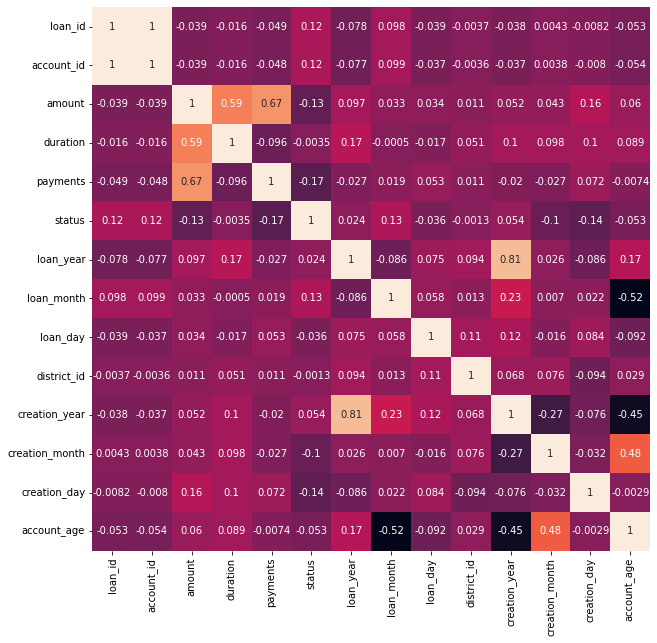

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_accounts.corr(), annot=True, cbar=False)

We can see a correlation between creation_year and loan_year, let's analyse these columns better

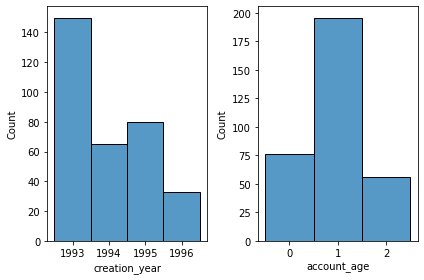

In [14]:
fig, ax = plt.subplots(1,2)

# Create the graphics
sns.histplot(data=loan_accounts, x='creation_year', discrete=True, ax=ax[0])
sns.histplot(data=loan_accounts, x='account_age', discrete=True, ax=ax[1])

# Display the figures in a nice way
fig.tight_layout()

The correlation makes sense as its common in this dataset to create loans with accounts of one year